In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder 
from sklearn import tree

In [4]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

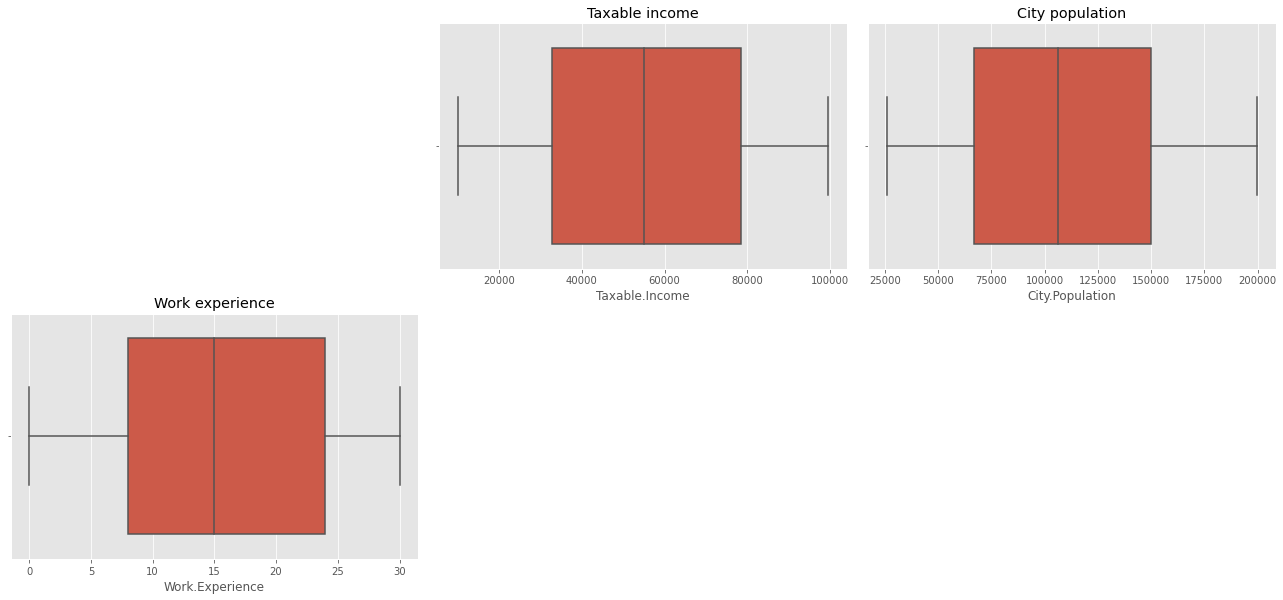

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(18,12))

plt.subplot(3,3,2)
sns.boxplot(data['Taxable.Income'])
plt.title('Taxable income')

plt.subplot(3,3,3)
sns.boxplot(data['City.Population'])
plt.title('City population')

plt.subplot(3,3,4)
sns.boxplot(data['Work.Experience'])
plt.title('Work experience')

plt.tight_layout()

### >> No outliers

## Adding new column for treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [9]:
data['income'] = '30000'

In [10]:
data.loc[data['Taxable.Income'] > 30000 , 'income'] = "Good"
data.loc[data['Taxable.Income'] <= 30000 , 'income'] = "Risky" 
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [11]:
data.drop('Taxable.Income' , axis =1 , inplace= True)
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [12]:
data['income'].value_counts()

Good     476
Risky    124
Name: income, dtype: int64

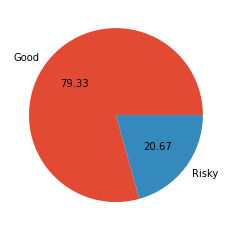

In [13]:
plt.pie(data['income'].value_counts() , labels= ['Good' , 'Risky'] , autopct='%0.2f')
plt.show()

In [14]:
label_en = LabelEncoder()
for i in range(0 , data.shape[1]):
    if data.dtypes[i] == 'object':
        data[data.columns[i]] = label_en.fit_transform(data[data.columns[i]])
    

In [15]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [16]:
x = data.drop('income' , axis = 1)
y = data['income']

In [17]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.2)

## Model Building

In [18]:
model = DecisionTreeClassifier(random_state= 40)
criterion = ['gini', 'entropy']
max_depth= range (0,12)
params_grid = [{'criterion' : criterion , 'max_depth' : max_depth}]
grid = GridSearchCV(estimator = model , param_grid = params_grid)
grid.fit(x_train , y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(0, 12)}])

In [19]:
print('Best params:' , grid.best_params_)
print('Best score:' , grid.best_score_)

Best params: {'criterion': 'gini', 'max_depth': 1}
Best score: 0.7895833333333334


In [20]:
final_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 1 , random_state= 40)
final_model.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=40)

## Model evaluation on trained data

In [21]:
y_train_pred = final_model.predict(x_train)
accuracy_score(y_train ,y_train_pred)

0.8

In [22]:
confusion_matrix(y_train , y_train_pred)

array([[384,   0],
       [ 96,   0]], dtype=int64)

In [23]:
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       384
           1       0.00      0.00      0.00        96

    accuracy                           0.80       480
   macro avg       0.40      0.50      0.44       480
weighted avg       0.64      0.80      0.71       480



#### >> 79% accuracy and 0% recall on the test data. That’s a huge difference!
#### >> Model prediction is highly biased.
#### >> So to handle the imabalanced data, will be using SMOTE technique.

## Handling imbalanced trained data using SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 40)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [25]:
print('x_train after resampling shape : ' , x_train_res.shape)
print('y_train after resampling shape : ' , y_train_res.shape)
print(y_train_res.value_counts())

x_train after resampling shape :  (768, 5)
y_train after resampling shape :  (768,)
0    384
1    384
Name: income, dtype: int64


In [26]:
print(y_test.value_counts())

0    92
1    28
Name: income, dtype: int64


## Building Decision Tree Classifier Model with balanced train data

In [27]:
model = DecisionTreeClassifier(random_state=40)
criterion = ['entropy', 'gini']
max_depth = range(1,10)
params = [{'criterion': criterion , 'max_depth':max_depth}]
grid = GridSearchCV(estimator=model, param_grid=params, cv = 10)
grid.fit(x_train_res, y_train_res)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=40),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(1, 10)}])

In [28]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 9}
0.7109876965140123


In [29]:
model_final= DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=40)
model_final.fit(x_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, random_state=40)

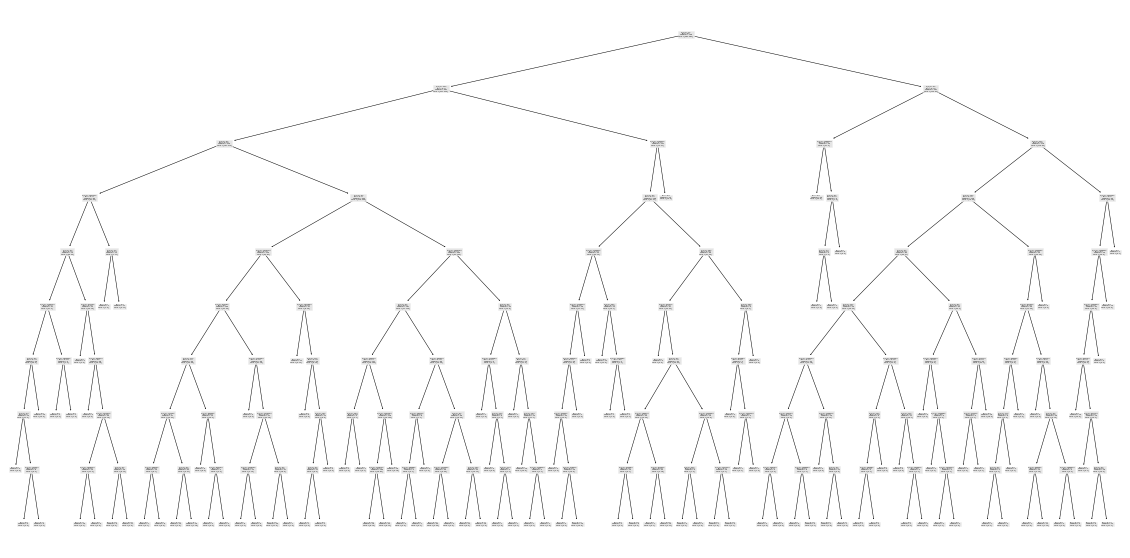

In [31]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_final);

## Model Evaluation on trained data

In [32]:
y_train_pred = model_final.predict(x_train_res)
accuracy_train = accuracy_score(y_train_res, y_train_pred) 
print('Accuracy score for trained data: ', round(accuracy_train, 4))

Accuracy score for trained data:  0.8919


In [33]:
confusion_matrix(y_train_res, y_train_pred)

array([[349,  35],
       [ 48, 336]], dtype=int64)

In [34]:
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       384
           1       0.91      0.88      0.89       384

    accuracy                           0.89       768
   macro avg       0.89      0.89      0.89       768
weighted avg       0.89      0.89      0.89       768



## Predicting model on test data

In [35]:
y_test_pred= model_final.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy Score of Test data :', round(accuracy_test, 4))

Accuracy Score of Test data : 0.5833


In [36]:
confusion_matrix(y_test, y_test_pred)

array([[64, 28],
       [22,  6]], dtype=int64)

In [37]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        92
           1       0.18      0.21      0.19        28

    accuracy                           0.58       120
   macro avg       0.46      0.45      0.46       120
weighted avg       0.61      0.58      0.60       120



## Conclusion:
This final model(built after handling imbalanced data) is better than the first model(built with imbalanced data) because it classifies better and also the recall value of minority class is 43 %. But due to undersampling of majority class, its recall has decreased to 57 %. So in this case, SMOTE is giving me a great accuracy and recall, I’ll go ahead and use that model!